In [1]:
import pandas as pd
import nltk
from nltk.corpus import webtext
from nltk.probability import FreqDist
# from wordcloud import WordCloud
from wordcloud import WordCloud

import matplotlib.pyplot as plt
from nltk import sent_tokenize, word_tokenize

nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hugho\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hugho\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
myWords = []
data = pd.read_csv('Data/sample_100.csv', encoding='utf-8', keep_default_na=False, skipinitialspace=True)
index = data.index
number_of_rows = len(index)
print(number_of_rows)

99


In [12]:
#tokenize the words
for row in data['Description']:
    myWords = myWords + nltk.word_tokenize(row)
    
# create frequency distribution
data_analysis = nltk.FreqDist(myWords)
print(data_analysis)
#filter out smaller words - get rid of short words such as in, the, and etc.
filter_words = dict([(m, n) for m,n in data_analysis.items() if len(m) > 4])

#generate wordcloud with library
wcloud = WordCloud().generate_from_frequencies(filter_words)
    

<FreqDist with 35 samples and 904 outcomes>


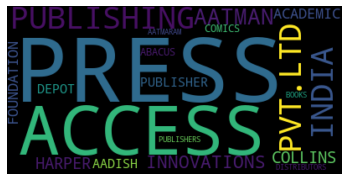

In [7]:
# PLOT WORDLCOULD

#bilinear - visualize data in particular way
plt.imshow(wcloud, interpolation="bilinear")

#don't want axis - just a wordcloud
plt.axis('off')

#define where things are plotted
(-1.5, 200, 100, -2.5)

plt.show()


In [10]:
#STEMMING 
#convert all of our words to their root word

#PORTER STEMMING - (another is snowball stemming)

from nltk.stem import PorterStemmer
e_words=["dance", "danced", "dancing", "dancer", "dances"]
ps = PorterStemmer()
for w in e_words:
    rootWord = ps.stem(w)
    print(rootWord)

# this processer finds that dancer has a different roto from the rest

danc
danc
danc
dancer
danc


In [11]:
# LEMMATIZE
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

print('dance: ', lemmatizer.lemmatize('dance'))
print('dances: ', lemmatizer.lemmatize('dances'))

#extra context for lemmatizer
    # v = verb
    
print('dancing: ', lemmatizer.lemmatize('dancing', pos='v'))
print('dancing: ', lemmatizer.lemmatize('dancing', pos='a'))

dance:  dance
dances:  dance
dancing:  dance
dancing:  dancing
